<img src="https://github.com/djp840/MSDS_453_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS453 - Research Assignment 01 - First Vectorized Representation


Our goal in this exercise is to BEGIN coming to a common agreement, among this class, as to what terms we will use as we selectively refine our corpus-wide vocabulary. This corpus vocabulary is what would represent the content of each different document for clustering and classification purposes, which will be our next step. This means that we need to make decisions - what is in, what is out.

### Importing Packages

In [270]:
import pandas as pd
import os
import numpy as np
import re
import string
from packaging import version

from numpy import array
from numpy import argmax

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import gensim
from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

<div class="alert alert-block alert-danger">
<b>Gensim</b> is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community <br><br>
    <b>https://pypi.org/project/gensim/ </b>
</div>

In [271]:
import pkg_resources
pkg_resources.require("gensim<=3.8.3");

In [272]:
print("Genism Version: ", gensim.__version__)

Genism Version:  3.8.3


### NLTK Downloads

In [273]:
# Only run this once, they will be downloaded.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [274]:
import warnings
warnings.filterwarnings('ignore')

### Create List of Stop Words from NLTK

In [275]:
stop_words = set(stopwords.words("english"))

### Mount Google Drive to Colab Environment

In [276]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### One-hot Encoding Example 

In [277]:
# define example
data = ['ginsburg', 'RBG', 'justice', 'ginsburg']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
#print(onehot_encoded[0, :])
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

['ginsburg' 'RBG' 'justice' 'ginsburg']
[1 0 2 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## NLP Data Functions

### Pre-process dataset to remove punctuation

In [278]:
def remove_punctuation(in_text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(in_text))
    return text

### Pre-process dataset to lower case it

In [279]:
def lower_case(in_text):
    # Convert to lowercase
    text = in_text.lower()    
    return text

### Pre-process dataset to remove tags

In [280]:
def remove_tags(in_text):    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",in_text)
    return text

### Pre-process dataset to remove special characters and digits

In [281]:

def remove_special_chars_and_digits(in_text):
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",in_text)
    return text


### Pre-process dataset to appy Stemming

In [282]:
def apply_stemming(in_text):
    stemmer=PorterStemmer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([stemmer.stem(w) for w in word_list])
    return output

### Pre-process dataset to apply Lemmatization

In [283]:
def apply_lemmatization(in_text):
    # Lemmatization
    lem = WordNetLemmatizer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([lem.lemmatize(w) for w in word_list])
    return output

### Remove stop words

In [284]:
def remove_stop_words(in_text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
#     filtered_sentence = [] 
#     for w in word_tokens: 
#         if w not in stop_words: 
#             filtered_sentence.append(w) 

    return filtered_sentence

### Run Phase Machine

In [285]:
def run_phrase_machine(in_text):
    phrases=phrasemachine.get_phrases(in_text)
    return phrases

### Run Rake Keyword Extractor

In [286]:
def run_rake(in_text):
    r = Rake()
    r.extract_keywords_from_text(in_text)
    rake_phrases= r.get_ranked_phrases()
    return rake_phrases

### Run NLTK Tokenizer

In [287]:
def run_nltk_tokenizer(in_text):
    tokens=nltk.word_tokenize(in_text)
    return tokens

### Run NLTK Sentence Tokenizer

In [288]:
def run_nltk_sent_tokenizer(in_corpus):
    sents = nltk.sent_tokenize(in_corpus)
    return sents

### Run word-ngram Tokenizer

In [289]:
def run_nltk_tokenizer_word_ngrams(in_text, ngram_size):
    n_grams = ngrams(nltk.word_tokenize(in_text), ngram_size)
    return [ ' '.join(grams) for grams in n_grams]

### Get Frequency Distribution 

In [290]:
def get_freq_dist(terms):
    all_counts = dict()
    all_counts[size] = FreqDist(terms)
    return all_counts

### Processing Text into Lists

In [291]:
def get_corpus(path_to_file):
    #read in class corpus csv into python
    data=pd.read_csv(path_to_file)

    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(data['DSI_Title'].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        temp_text=clean_doc(temp_text)
        temp_text = ' '.join(map(str, temp_text))
        text_body.append(temp_text)
    return (docids,titles,text_body)

#  <font color='red'> methods3 for data wragling remove punctuation,stop words,lemitization ,lower and remove non alphabets

# function for data wrangling 

In [292]:
# method 3 remove punctutaion  , stopwords and lemetization, lower and keep character


def clean_doc(doc): 
     
    
    doc= remove_punctuation(doc)
    doc = lower_case(doc)
    #remove stop word
    doc = ' '.join(remove_stop_words(doc))
    #apply lemitization
    doc = apply_lemmatization(doc)
    #apply stemming
    #doc = apply_stemming(doc)
    #split document into individual words
    tokens= doc.split()   
    #tokens = list(filter(None, doc))
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    #remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]

    #remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word.lower() for word in tokens]

    return tokens

In [293]:
# def process_corpus(data):
        
#     #create empty list to store text documents titles
#     titles=[]
    
#     #for loop which appends the DSI title to the titles list
#     for i in range(0,len(data)):
#         temp_text=data['DSI_Title'].iloc[i]
#         titles.append(temp_text)
    
#     #create empty list to store text documents
#     text_body=[]
    
#     #for loop which appends the text to the text_body list
#     for i in range(0,len(data)):
#         temp_text=data['Text'].iloc[i]
#         text_body.append(temp_text)
    
#     #Note: the text_body is the unprocessed list of documents read directly form 
#     #the csv.
        
#     #empty list to store processed documents
#     processed_text=[]
#     #for loop to process the text to the processed_text list
#     for i in text_body:
#         text=clean_doc(i)
#         processed_text.append(text)
    
#     #Note: the processed_text is the PROCESSED list of documents read directly form 
#     #the csv.  Note the list of words is separated by commas.
    
    
#     #stitch back together individual words to reform body of text
#     final_processed_text=[]
    
#     for i in processed_text:
#         temp_DSI=i[0]
#         for k in range(1,len(i)):
#             temp_DSI=temp_DSI+' '+i[k]
#         final_processed_text.append(temp_DSI)
    
#     return titles, final_processed_text, processed_text

# <font color='red'> Functions to get  word2vec, doc2vec and  visualize documents

In [294]:
# def clean_doc(doc): 
#     #split document into individual words
#     doc = ' '.join(remove_stop_words(doc))
#     doc = apply_lemmatization(doc)

#     tokens=doc.split()
#     re_punc = re.compile('[%s]' % re.escape(string.punctuation))
#     # remove punctuation from each word
#     tokens = [re_punc.sub('', w) for w in tokens]
#     # remove remaining tokens that are not alphabetic
#     tokens = [word for word in tokens if word.isalpha()]
#     # filter out short tokens
#     tokens = [word for word in tokens if len(word) > 4]
#     #lowercase all words
#     tokens = [word.lower() for word in tokens]
    
#     return tokens

def process_corpus(data):
        
    #create empty list to store text documents titles
    titles=[]
    
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        temp_text=data['DSI_Title'].iloc[i]
        titles.append(temp_text)
    
    #create empty list to store text documents
    text_body=[]
    
    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)
    
    #Note: the text_body is the unprocessed list of documents read directly form 
    #the csv.
        
    #empty list to store processed documents
    processed_text=[]
    #for loop to process the text to the processed_text list
    for i in text_body:
        text=clean_doc(i)
        processed_text.append(text)
    
    #Note: the processed_text is the PROCESSED list of documents read directly form 
    #the csv.  Note the list of words is separated by commas.
    
    
    #stitch back together individual words to reform body of text
    final_processed_text=[]
    
    for i in processed_text:
        temp_DSI=i[0]
        for k in range(1,len(i)):
            temp_DSI=temp_DSI+' '+i[k]
        final_processed_text.append(temp_DSI)
    
    return titles, final_processed_text, processed_text

def run_doc2vec(final_processed_text, processed_text):
    #create doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
    model = Doc2Vec(documents, vector_size=200, window=3, min_count=2, workers=4)    
    
    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)
        
    return doc2vec_df

def run_word2vec(processed_text):

    #word to vec model
    model_w2v = Word2Vec(processed_text, size=200, window=3, min_count=2, workers=4)
    
    labels = []
    tokens = []

    for word in model_w2v.wv.vocab:
        tokens.append(model_w2v[word])
        labels.append(word)
    
    
    return labels, tokens, model_w2v





def plot_doc2vec(doc2vec_df, titles,_perplexity=10):
    #visualize documents through applying TSNE to doc2vec matrix
    tsne_model = TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=2500, random_state=23)
    doc2vec_df = tsne_model.fit_transform(doc2vec_df)
    x = []
    y = []
    for value in doc2vec_df:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(titles[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    

def plot_word2vec(model, labels, tokens, _perplexity=30):
    "Creates and TSNE model and plots it"
    words = []
    embeddings = []
    for word in list(model.wv.vocab):
        embeddings.append(model.wv[word])
        words.append(word)
    pca = PCA(n_components=2).fit(tokens)
    X_pca = pca.transform(tokens)

    tsne_model= TSNE(perplexity=_perplexity, n_components=2, init='pca', n_iter=3500, random_state=32)
    new_values = tsne_model.fit_transform(X_pca)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(40, 40)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    

### Processing Text into Lists for tfidf

In [295]:
def get_corpus(path_to_file):
    #read in class corpus csv into python
    data=pd.read_csv(path_to_file)

    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(data['DSI_Title'].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        temp_text=clean_doc(temp_text)
        temp_text = ' '.join(map(str, temp_text))
        text_body.append(temp_text)
    return (docids,titles,text_body)

### Source Class Corpus  

In [296]:
path_to_file='C://Users//hag8665//Desktop//MSDS 453//Assignment_1//Class_Corpus_v2.csv'
docids,titles,text=get_corpus(path_to_file)


In [297]:
# vectorizer = CountVectorizer(ngram_range = (1,1))
# matrix=vectorizer.fit_transform(text) 

In [298]:
#vectorizer.get_feature_names()

### Retreive Word Count Frequencies 

In [299]:
vectorizer = CountVectorizer(ngram_range = (1,1))
matrix=vectorizer.fit_transform(text)     

#creating datafram from TFIDF Matrix
words = vectorizer.get_feature_names()
matrix=pd.DataFrame(matrix.toarray(), columns=words, index=titles)
frequencies = matrix.sum().transpose().reset_index()
frequencies.columns = ['word', 'counts']
frequencies.sort_values("counts",ascending = False , inplace =True)
frequencies.head(10)

word  counts
5197        film    1165
8880       movie    1026
9411         one     808
7910        like     667
13899       time     458
2164   character     424
8225        make     414
5761         get     412
13081      story     361
4742        even     355

In [300]:
frequencies.shape

(15479, 2)

### Calculates TFIDF and Saves TFIDF Values for Terms 

Output Directory Pathway - Update to Environment

In [301]:
vectorizer = TfidfVectorizer(use_idf=True, norm=None)
transformed_documents = vectorizer.fit_transform(text)
transformed_documents_as_array = transformed_documents.toarray()

####################################################################################
# NOTE THIS SAVE A FILE FOR EACH DOCUMENT TO YOUR HARD DRIVE
# It first creates a directory called td_idf_output
# Then for each document it will generate a file with the words and tf idf scores
###################################################################################
# output_dir ="C:\\Users\\hag8665\\Desktop\\MSDS 453\\Assignment_1\\output"

# import os
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for counter, doc in enumerate(transformed_documents_as_array):
#     # construct a dataframe
#     tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
#     one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples
#                                               ,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)

#     # output to a csv using the enumerated value for the filename
#     one_doc_as_df.to_csv(output_dir+"/"+str(titles[counter]))
    


# get count and mean tfidf scors

In [302]:
words_tfidf = vectorizer.get_feature_names()
matrix_tfidf=pd.DataFrame(transformed_documents.toarray(), columns=words_tfidf, index=titles)

In [303]:
meantfidf = matrix_tfidf.mean().transpose().reset_index()
meantfidf.columns = ['word', 'counts']
meantfidf.sort_values("counts",ascending = False , inplace =True)
meantfidf.head(10)

word    counts
5197        film  5.276811
8880       movie  4.938195
9411         one  3.586873
7910        like  3.133032
1521        bond  3.007107
3182     cruella  2.853147
13899       time  2.373419
5025      family  2.350925
2164   character  2.300459
5761         get  2.225977

# top 10 tfidf mean highest scores

In [323]:

frequenciestfidf = matrix_tfidf.mean().transpose().reset_index()
frequenciestfidf.columns = ['word', 'mean_tfidf_score']
frequenciestfidf.sort_values("mean_tfidf_score",ascending = False , inplace =True)
frequenciestfidf.head(10).round(3).reset_index()

index       word  mean_tfidf_score
0   5197       film             5.277
1   8880      movie             4.938
2   9411        one             3.587
3   7910       like             3.133
4   1521       bond             3.007
5   3182    cruella             2.853
6  13899       time             2.373
7   5025     family             2.351
8   2164  character             2.300
9   5761        get             2.226

# finding scores for labels in step 1

In [305]:
step1_list = [ 'Frozen 2',
              'Elsa',
             'Anna',
            'Kristoff',
            'Sven',
            'Olaf',
            'Josh Gad',
            'Kristen Bell',
            'Jonathan Groff',
            'Idina Menzel',
            'spectacular',
            'sweet spot' ,
            'fun',
            'cash grab',
            'warm',
            'disappointed',
            'bored',
            'joy',
              'lackluster',
              'sweet',
              'jaded',
              'enjoy',
              'Menzel',
              'disappointed',
              'abhorent',
              'sequel'
            'entertain',
             'Frozen',
             'comedy',
             'surprising',
             'underwhelmed','dazzling', 'pleasant']


In [306]:
#step1_list +[item.lower() for item in step1_list]

In [324]:
frequenciestfidf.loc[frequenciestfidf['word'].isin(step1_list +[item.lower() for item in step1_list])].round(3).reset_index()

index          word  mean_tfidf_score
0    5580        frozen             1.179
1    5604           fun             1.037
2    4411          elsa             1.010
3    2582        comedy             0.952
4     552          anna             0.729
5    4559         enjoy             0.358
6   12746   spectacular             0.299
7   13468         sweet             0.293
8    7669      kristoff             0.282
9    9391          olaf             0.248
10   8528        menzel             0.237
11   3796  disappointed             0.237
12   7477           joy             0.207
13  14976          warm             0.182
14  13396    surprising             0.156
15   3356      dazzling             0.152
16  13437          sven             0.139
17   1551         bored             0.110
18  10124      pleasant             0.095
19   7694    lackluster             0.095
20   7357         jaded             0.062
21  14413  underwhelmed             0.023

In [308]:
# DATA FRAME SHOWS THE TFIDF SCORES FOR ALL THE WORDS FOR EACH DOCUMENT

In [309]:
matrix_tfidf.apply(lambda x: x.sort_values(ascending =False).values)

aaah    abaire   abandon  abandoned  abandoning  \
HAG_Doc1_Frozen2      5.828314  9.151102  9.459403   4.442019    5.422849   
HAG_Doc2_Frozen2      0.000000  4.575551  4.729701   4.442019    5.422849   
HAG_Doc3_Frozen2      0.000000  4.575551  4.729701   4.442019    0.000000   
HAG_Doc4_Frozen2      0.000000  4.575551  4.729701   4.442019    0.000000   
HAG_Doc5_Frozen2      0.000000  4.575551  4.729701   4.442019    0.000000   
...                        ...       ...       ...        ...         ...   
OFZ_Doc6_PACIFICRIM   0.000000  0.000000  0.000000   0.000000    0.000000   
OFZ_Doc7_PACIFICRIM   0.000000  0.000000  0.000000   0.000000    0.000000   
OFZ_Doc8_PACIFICRIM   0.000000  0.000000  0.000000   0.000000    0.000000   
OFZ_Doc9_PACIFICRIM   0.000000  0.000000  0.000000   0.000000    0.000000   
OFZ_Doc10_PACIFICRIM  0.000000  0.000000  0.000000   0.000000    0.000000   

                      abandonment   abashed     abbey      abby  abducted  \
HAG_Doc1_Frozen2         4.912023  5.828314  5.828314  5.828314  8.884039   
HAG_Doc2_Frozen2         4.912023  0.000000  0.000000  0.000000  4.442019   
HAG_Doc3_Frozen2         4.912023  0.000000  0.000000  0.000000  4.442019   
HAG_Doc4_Frozen2         4.912023  0.000000  0.000000  0.000000  4.442019   
HAG_Doc5_Frozen2         0.000000  0.000000  0.000000  0.000000  4.442019   
...                           ...       ...       ...       ...       ...   
OFZ_Doc6_PACIFICRIM      0.000000  0.000000  0.000000  0.000000  0.000000   
OFZ_Doc7_PACIFICRIM      0.000000  0.000000  0.000000  0.000000  0.000000   
OFZ_Doc8_PACIFICRIM      0.000000  0.000000  0.000000  0.000000  0.000000   
OFZ_Doc9_PACIFICRIM      0.000000  0.000000  0.000000  0.000000  0.000000   
OFZ_Doc10_PACIFICRIM     0.000000  0.000000  0.000000  0.000000  0.000000   

                      ...       zoe       zog    zombie  zombified      zone  \
HAG_Doc1_Frozen2      ...  4.324236  5.828314  9.151102   5.828314  3.956512   
HAG_Doc2_Frozen2      ...  4.324236  0.000000  4.575551   0.000000  3.956512   
HAG_Doc3_Frozen2      ...  4.324236  0.000000  4.575551   0.000000  3.956512   
HAG_Doc4_Frozen2      ...  4.324236  0.000000  4.575551   0.000000  3.956512   
HAG_Doc5_Frozen2      ...  4.324236  0.000000  4.575551   0.000000  3.956512   
...                   ...       ...       ...       ...        ...       ...   
OFZ_Doc6_PACIFICRIM   ...  0.000000  0.000000  0.000000   0.000000  0.000000   
OFZ_Doc7_PACIFICRIM   ...  0.000000  0.000000  0.000000   0.000000  0.000000   
OFZ_Doc8_PACIFICRIM   ...  0.000000  0.000000  0.000000   0.000000  0.000000   
OFZ_Doc9_PACIFICRIM   ...  0.000000  0.000000  0.000000   0.000000  0.000000   
OFZ_Doc10_PACIFICRIM  ...  0.000000  0.000000  0.000000   0.000000  0.000000   

                          zoom     zoomy  zootopia      zora      zorro  
HAG_Doc1_Frozen2      4.912023  5.828314  5.135167  4.575551  10.845697  
HAG_Doc2_Frozen2      4.912023  0.000000  5.135167  4.575551   5.422849  
HAG_Doc3_Frozen2      4.912023  0.000000  5.135167  4.575551   0.000000  
HAG_Doc4_Frozen2      4.912023  0.000000  0.000000  4.575551   0.000000  
HAG_Doc5_Frozen2      0.000000  0.000000  0.000000  4.575551   0.000000  
...                        ...       ...       ...       ...        ...  
OFZ_Doc6_PACIFICRIM   0.000000  0.000000  0.000000  0.000000   0.000000  
OFZ_Doc7_PACIFICRIM   0.000000  0.000000  0.000000  0.000000   0.000000  
OFZ_Doc8_PACIFICRIM   0.000000  0.000000  0.000000  0.000000   0.000000  
OFZ_Doc9_PACIFICRIM   0.000000  0.000000  0.000000  0.000000   0.000000  
OFZ_Doc10_PACIFICRIM  0.000000  0.000000  0.000000  0.000000   0.000000  

[249 rows x 15479 columns]

In [310]:
data = pd.read_csv(path_to_file)

### Create Word and Document Embedding

In [311]:
#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)




# <font color='red'> method word2vec =200

In [312]:
#word to vec
model_w2v = Word2Vec(processed_text, size=200, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)


In [313]:

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.head(10)

0         1         2         3         4         5    \
dog           0.047137  0.043619  0.059356 -0.123877  0.096133  0.059557   
funny         0.067768  0.070280  0.094561 -0.184969  0.144061  0.088434   
dotes         0.000735  0.003919  0.001594 -0.006180  0.003622  0.003862   
radiation     0.003458  0.001531  0.003317 -0.006203  0.004018  0.003286   
hubba         0.001816  0.003474  0.004889 -0.004604  0.004963  0.000495   
presumed      0.012778  0.014792  0.015645 -0.033978  0.025018  0.014677   
bloodstained  0.004029  0.000206  0.001843 -0.005150  0.005150  0.001780   
miss          0.022217  0.023756  0.034439 -0.066766  0.051344  0.028938   
scene         0.261473  0.259384  0.356003 -0.701343  0.551016  0.331743   
mr            0.085791  0.082583  0.117139 -0.226666  0.174949  0.106756   

                   6         7         8         9    ...       190       191  \
dog          -0.212483 -0.125743  0.074263  0.134987  ... -0.057775 -0.000664   
funny        -0.320401 -0.187006  0.109325  0.205412  ... -0.087444  0.002461   
dotes        -0.010388 -0.008315  0.002253  0.007362  ... -0.001538  0.002368   
radiation    -0.007139 -0.002666  0.004299  0.006205  ... -0.001703  0.000572   
hubba        -0.011559 -0.006249  0.002282  0.005590  ... -0.004341  0.001558   
presumed     -0.058112 -0.035164  0.021268  0.040737  ... -0.017627  0.001752   
bloodstained -0.009065 -0.006368  0.003139  0.005887  ... -0.004808  0.001874   
miss         -0.112170 -0.064568  0.040182  0.070023  ... -0.030799  0.001794   
scene        -1.214098 -0.714296  0.417626  0.782522  ... -0.336828  0.009896   
mr           -0.386648 -0.226986  0.135696  0.254097  ... -0.109304  0.002438   

                   192       193       194       195       196       197  \
dog           0.087596  0.047642  0.047496  0.020272  0.141265  0.072706   
funny         0.128523  0.073144  0.072275  0.031305  0.209050  0.112089   
dotes         0.004276  0.004173  0.001105  0.002567  0.009145  0.005978   
radiation     0.001726  0.001496  0.003609  0.002888  0.004793  0.004289   
hubba         0.002531  0.001544  0.000763  0.000625  0.008940  0.001185   
presumed      0.022759  0.015759  0.014420  0.004771  0.041637  0.019254   
bloodstained  0.002525  0.000589  0.000845  0.002086  0.005383  0.003400   
miss          0.046404  0.027241  0.023470  0.013886  0.073756  0.039229   
scene         0.493302  0.280415  0.265610  0.127268  0.803424  0.426656   
mr            0.156998  0.088774  0.084731  0.039002  0.255439  0.135918   

                   198       199  
dog           0.005068 -0.113765  
funny         0.008419 -0.167205  
dotes         0.001877 -0.005506  
radiation     0.000315 -0.002333  
hubba        -0.002074 -0.006247  
presumed      0.000606 -0.029270  
bloodstained -0.000257 -0.006106  
miss          0.004491 -0.062068  
scene         0.036880 -0.648414  
mr            0.010412 -0.206324  

[10 rows x 200 columns]

In [314]:
len(w2v_vectors)

15498

#   <font color='red'> method doc2vec is 200 

### Create Doc2Vec Embedding

In [315]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size=200, window=2, min_count=1, workers=4)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([t, doc2vec_df], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

doc2vec_df.head(10)

title         0         1         2         3         4  \
0   HAG_Doc1_Frozen2 -0.001678  0.002357 -0.001508  0.000526 -0.000014   
1   HAG_Doc2_Frozen2 -0.028289  0.012991 -0.008505 -0.011416 -0.018667   
2   HAG_Doc3_Frozen2 -0.030651  0.014310 -0.006560 -0.012229 -0.017660   
3   HAG_Doc4_Frozen2  0.001994  0.000652 -0.000036 -0.002035  0.000535   
4   HAG_Doc5_Frozen2 -0.014754  0.009691 -0.003578 -0.007234 -0.005009   
5   HAG_Doc6_Frozen2 -0.016553  0.010238 -0.006754 -0.010360 -0.014732   
6   HAG_Doc7_Frozen2 -0.004729  0.004608  0.000227 -0.000509 -0.006614   
7   HAG_Doc8_Frozen2 -0.001905  0.000099  0.000235 -0.001666 -0.000658   
8   HAG_Doc9_Frozen2  0.000358  0.002196 -0.001433  0.001406 -0.001555   
9  HAG_Doc10_Frozen2  0.000300  0.000224  0.000552  0.000072  0.001953   

          5         6         7         8  ...       190       191       192  \
0  0.002259 -0.001780 -0.001556 -0.000242  ... -0.001310  0.001005 -0.000527   
1 -0.019129 -0.013527 -0.016383  0.015893  ... -0.005214 -0.008585  0.001887   
2 -0.015595 -0.014043 -0.012840  0.014735  ... -0.008239 -0.009553  0.007709   
3 -0.000614  0.000131  0.001798  0.001625  ... -0.000147 -0.001074  0.002129   
4 -0.009435 -0.002068 -0.008775  0.003976  ... -0.002944 -0.001851  0.001615   
5 -0.018154 -0.008876 -0.009771  0.009424  ... -0.003149 -0.004707  0.003331   
6 -0.003041 -0.002758 -0.004083  0.006350  ... -0.001474 -0.002184  0.001085   
7  0.000016 -0.002500 -0.001945 -0.002356  ...  0.001072  0.002181  0.000009   
8  0.002048  0.002352  0.000811  0.001301  ...  0.000840 -0.000596 -0.001284   
9 -0.002020 -0.000668  0.001741  0.000228  ... -0.002194  0.000629 -0.000285   

        193       194       195       196       197       198       199  
0  0.000320  0.000339  0.000387 -0.000533  0.001605  0.002017  0.001050  
1 -0.010181 -0.013945 -0.001006  0.011276 -0.000556  0.013725 -0.036471  
2 -0.009388 -0.017803  0.000102  0.019628 -0.001423  0.021638 -0.046917  
3 -0.001523  0.002483 -0.002229 -0.000280  0.001462 -0.002348  0.001843  
4 -0.005963 -0.007385  0.001475  0.005681  0.001370  0.009467 -0.014410  
5 -0.007523 -0.010119 -0.000079  0.006420 -0.003329  0.010681 -0.023099  
6 -0.004919 -0.005713 -0.000698  0.000669  0.001173  0.000011 -0.008741  
7 -0.000217  0.000863 -0.000214 -0.001571  0.002188 -0.000393 -0.000813  
8 -0.001152  0.001656 -0.001920  0.002373  0.001309  0.000734 -0.000826  
9  0.001806 -0.000218 -0.002251  0.000012  0.000076 -0.001823 -0.000389  

[10 rows x 201 columns]

In [316]:
len(processed_text[248])

445

### Calculates the Cosine Similarity across your corpus using TFIDF matrix

In [317]:
doc_term_matrix = transformed_documents.todense()
df = pd.DataFrame(doc_term_matrix, 
                      columns=vectorizer.get_feature_names(), 
                      index=docids)
   
similarity  = cosine_similarity(df, df)

### Heatmap of Cosine Similarity of Documents

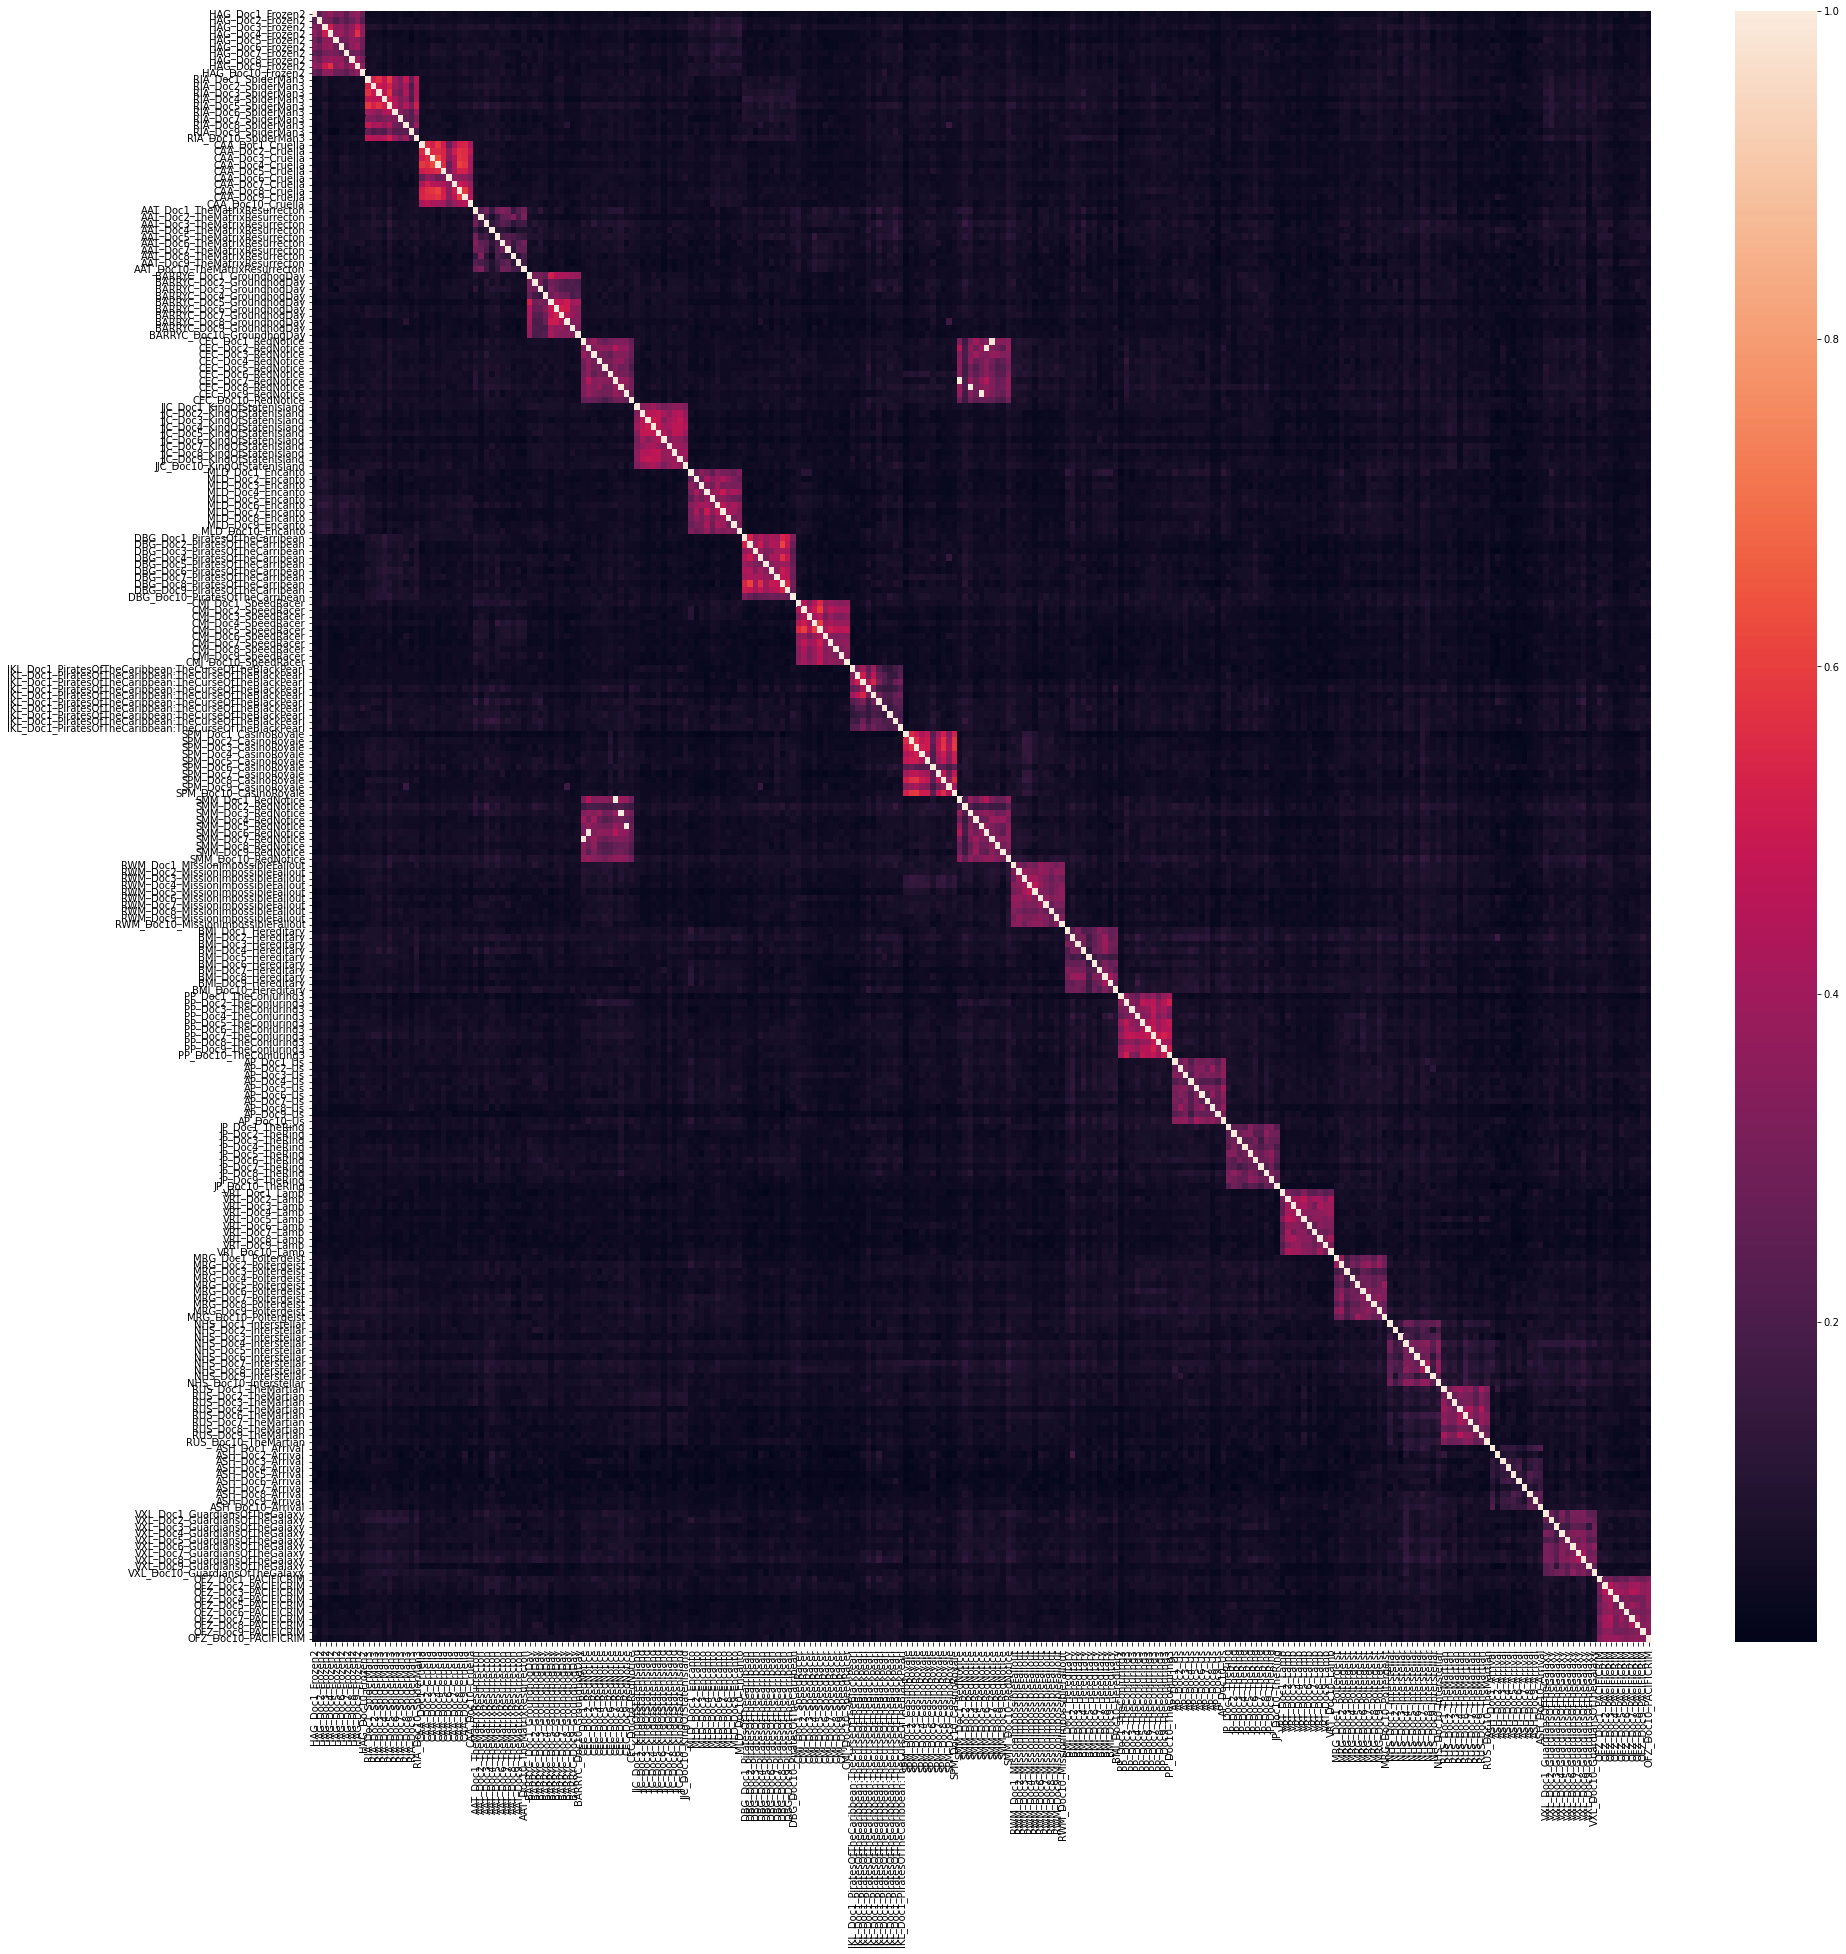

In [318]:
similarity  = cosine_similarity(df, df)
a4_dims = (30, 30)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax, data=similarity, xticklabels= titles, yticklabels=titles);

### Load Class Corpus

Output Directory Pathway - Update to Environment

In [319]:
data=pd.read_csv(path_to_file)

### Process Documents
1. Process documents
2. Create doc2vec matrix
3. Plotting with TSNE

In [320]:
#process documents
titles, final_processed_text, processed_text = process_corpus(data)
print(final_processed_text[0])

parent breathe sigh relief frozen new showstopper unknown isnt aggressive earworm let go lyrically complex lot high note kind thatll break eardrum sung anyone isnt idina menzel hard imagine car full kid howling delicate scale hour upon hour frozen disney sequel bn hit mature ambitious intricate predecessor doesnt automatically make better frozens success built simple relatable story sisterly love different enough feel like stale rerun surprise uncover renewed sense energy proceeding admittedly film play fire taking path sequel padding character backstory hope itll add depth world echo last month maleficent mistress evil queen elsa menzel carted magical place might provide answer come frozen succeeds many others failed sentient snowman olaf josh gad neatly summarises one scene elsa made peace ice power end frozen discovered key love rule arendelle anna kristen bell boyfriend kristoff jonathan groff provide sense domestic normalcy weekly charade session mysterious female voice provided n

In [321]:
doc2vec_df = run_doc2vec(final_processed_text, processed_text)
labels, tokens, word2vec_model = run_word2vec(processed_text)
print(len(tokens))

8738


### Plot doc2vec TSNE

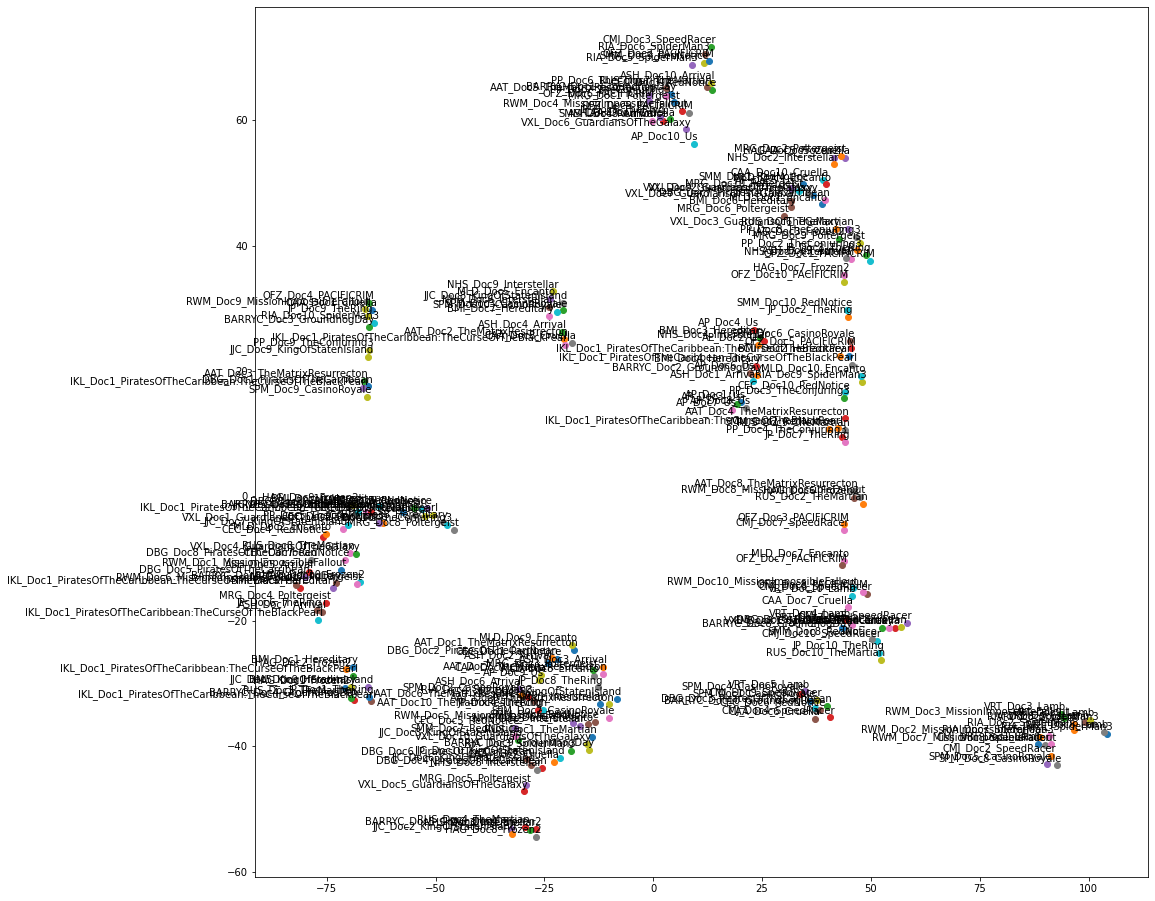

In [322]:
#visualize documents through applying TSNE to doc2vec matrix
pca = PCA(n_components=2).fit(doc2vec_df)
X_pca = pca.transform(doc2vec_df)
tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
doc2vec_df = tsne_model.fit_transform(X_pca)
x = []
y = []
for value in doc2vec_df:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(titles[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [253]:
##model.train(processed_text,total_examples=model.corpus_count, epochs=30)

In [254]:
#model.docvecs.doctags.keys()

### Plot doc2vec TSNE

In [255]:
# plot_doc2vec(doc2vec_df, titles,15)

### Plot word2vec TSNE

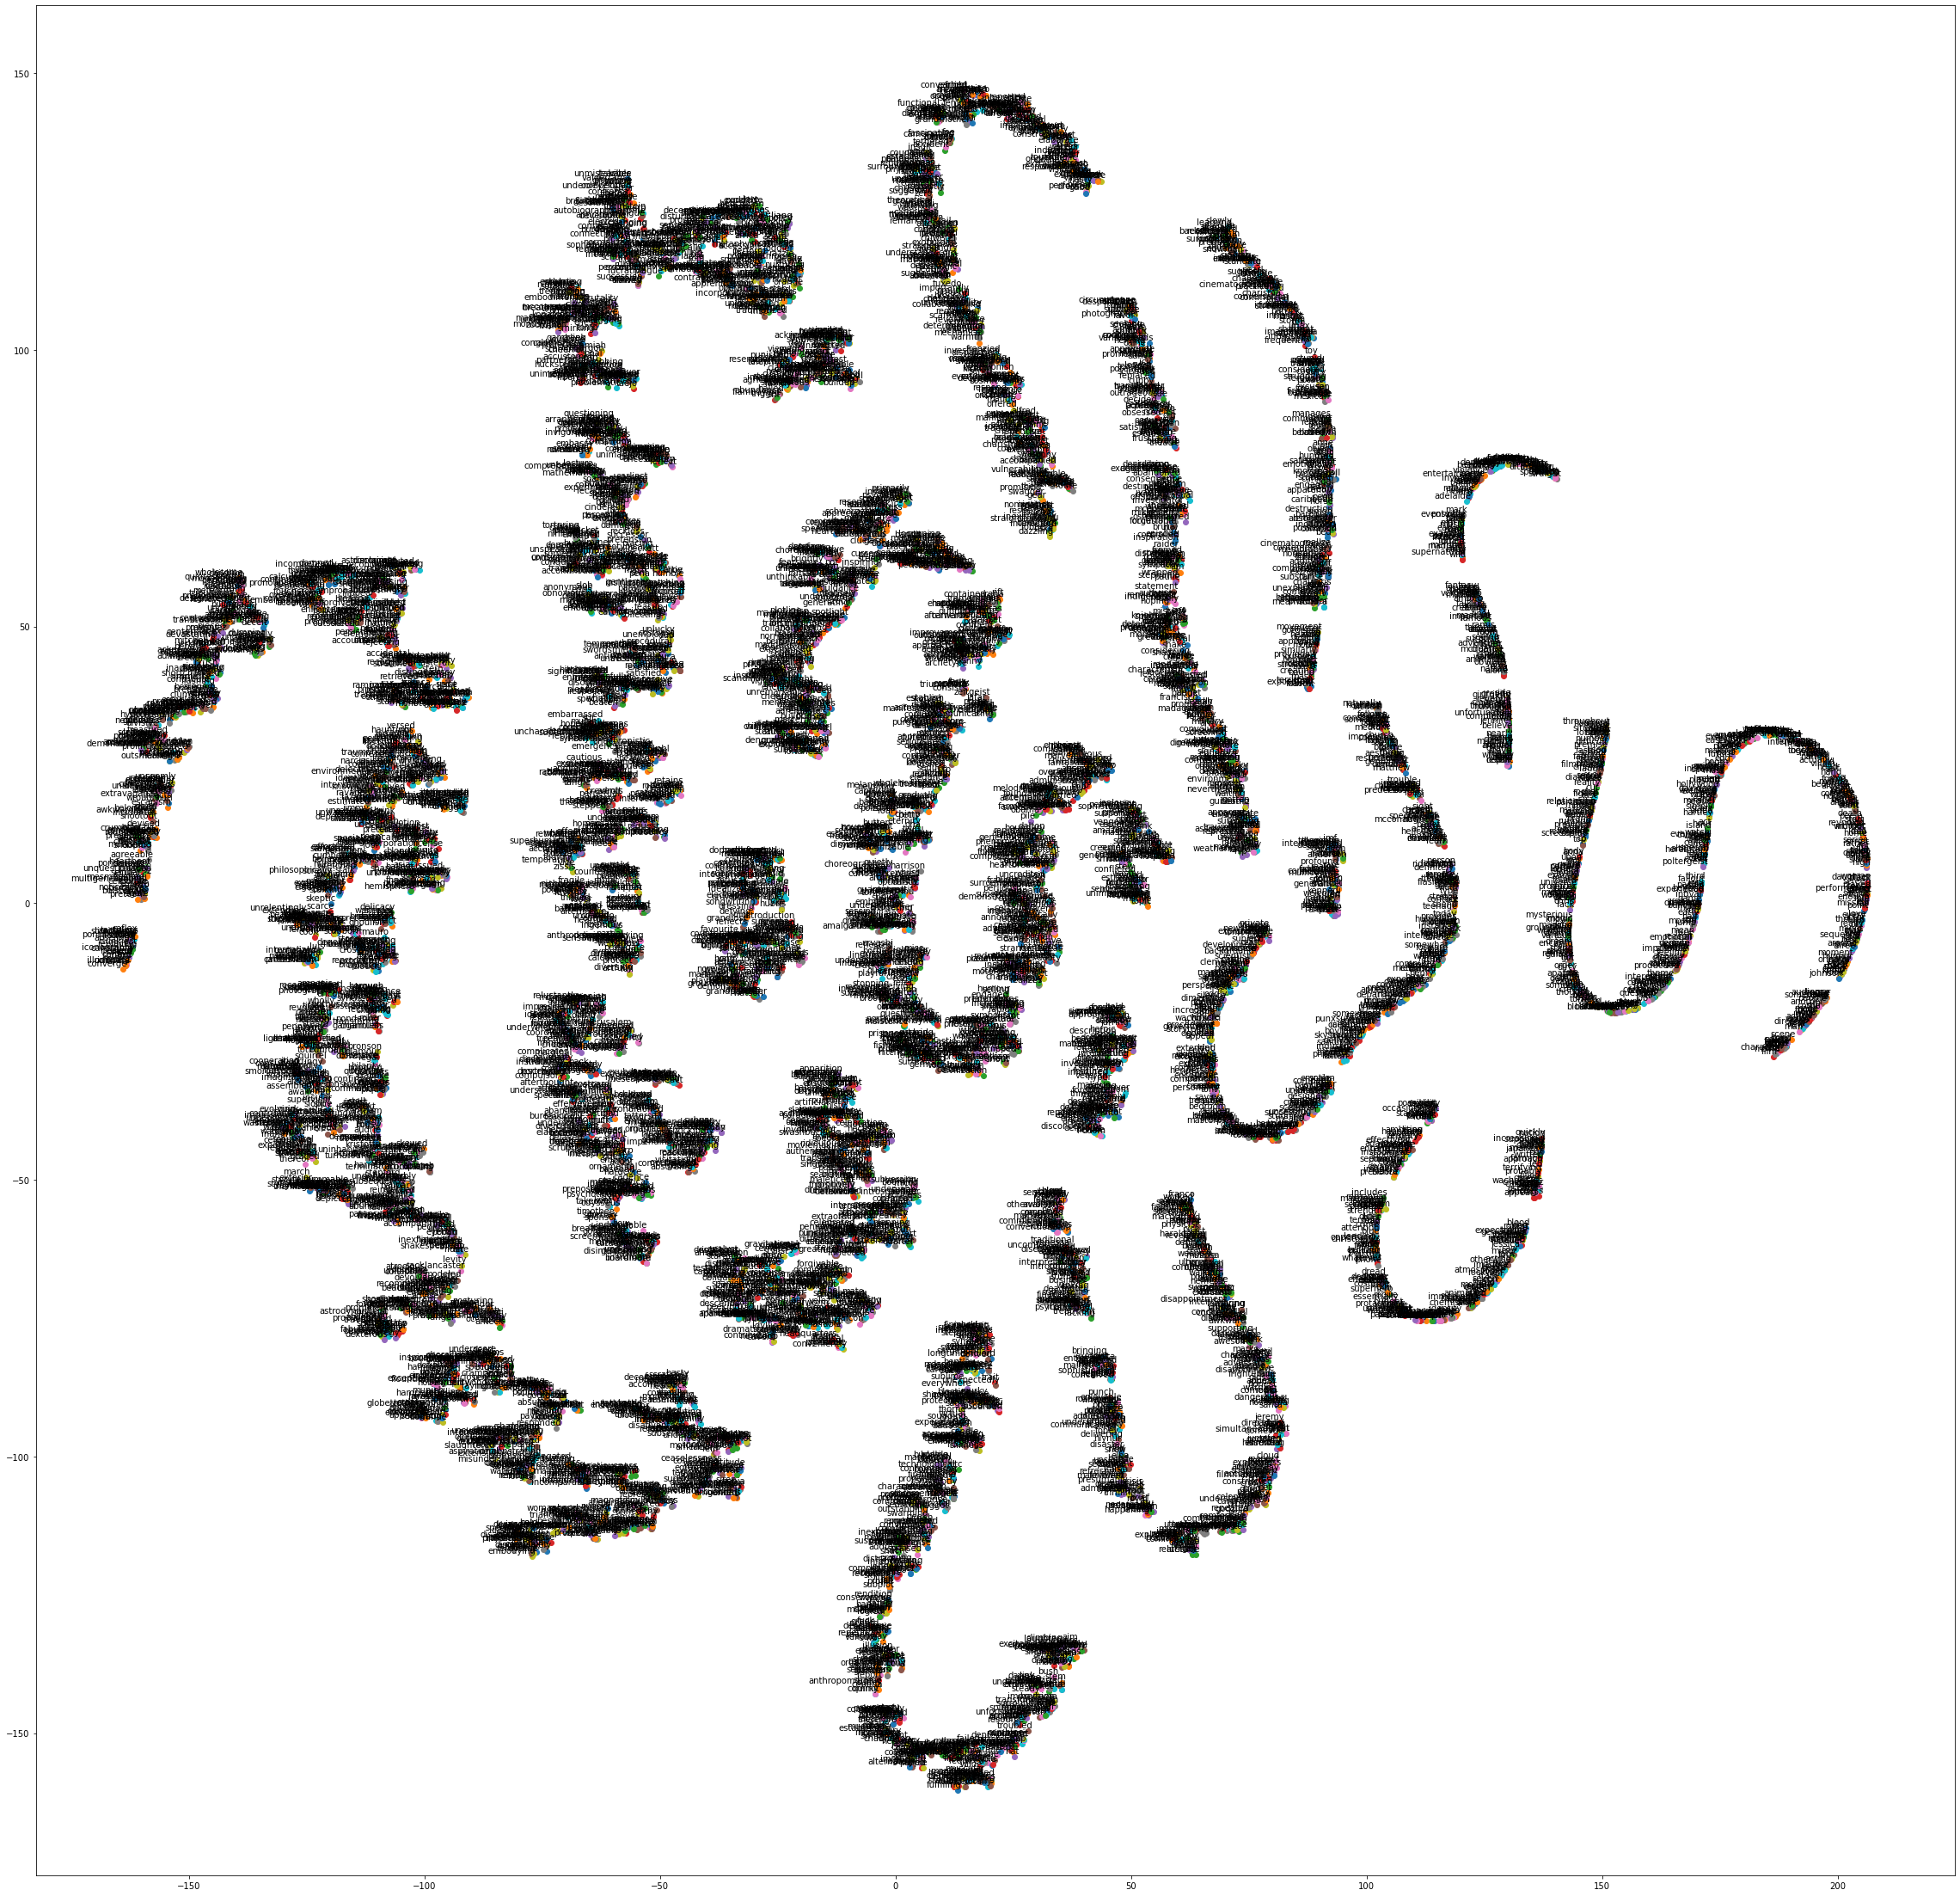

Wall time: 14min 55s


In [256]:
%%time
plot_word2vec(word2vec_model, labels, tokens,15)

In [257]:
# tsne_model= TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
# new_values = tsne_model.fit_transform(w2v_df)
# x = []
# y = []
# for value in new_values:
#     x.append(value[0])
#     y.append(value[1])

# plt.figure(figsize=(16, 16)) 
# for i in range(len(x)):
#     plt.scatter(x[i],y[i])
#     plt.annotate(titles[i],
#                  xy=(x[i], y[i]),
#                  xytext=(5, 2),
#                  textcoords='offset points',
#                  ha='right',
#                  va='bottom')
# plt.show()

### Explore K-means clustering of TFIDF matrix

In [359]:
#############################################
#Calculates tf idf
#Edit ngram range if you like
#############################################
def tfidf(corpus, titles, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(stop_words='english', ngram_range = ngram_range)

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words

#############################################
#Performs the k-means clustering of the tfidf matrix
#Edit the number of clusters
#############################################
def k_means_tfidf(tfidf_matrix,terms,titles,final_processed_text, k=10):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    km = KMeans(n_clusters=k, random_state =89)
    km = km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    print("Top terms per cluster:")
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    terms_dict=[]


    #save the terms for each cluster and document to dictionaries.  To be used later
    #for plotting output.

    #dictionary to store terms and titles
    cluster_terms={}
    cluster_title={}


    for i in range(k):
        #print("Cluster %d:" % i),
        temp_terms=[]
        temp_titles=[]
        for ind in order_centroids[i, :10]:
            #print(' %s' % terms[ind])
            terms_dict.append(terms[ind])
            temp_terms.append(terms[ind])
        cluster_terms[i]=temp_terms

        
        #print("Cluster %d titles:" % i, end='')
        temp=frame[frame['Cluster']==i]
        for title in temp['Doc Name']:
            #print(' %s,' % title, end='')
            temp_titles.append(title)
        cluster_title[i]=temp_titles
    return km, cluster_title 

#############################################
# Run the code
#############################################


In [392]:
tfidf_matrix, terms = tfidf(final_processed_text, titles)
k_tfidfmeans_model, clustertfidf_title = k_means_tfidf(tfidf_matrix,terms,titles,final_processed_text, k=10)

Top terms per cluster:


### Implementation of Silhouette Score 
Measurement most optimal number of clusters

In [393]:
k_list = [2, 5, 7, 10]
#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_matrix, labels)
    sil_scores.append(score)

### Plot Silhouette Scores

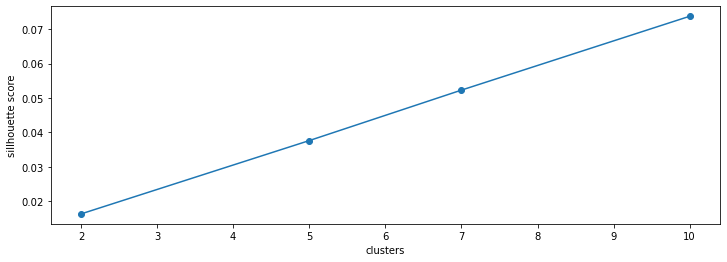

In [394]:
plt.figure(figsize=(12, 4))
plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

# Elbow Method

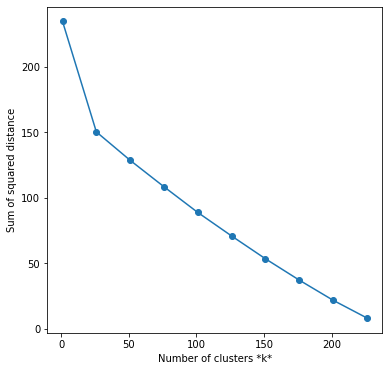

In [395]:

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 250,25))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(tfidf_matrix)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [396]:
#tfidf_matrix.reset_index(drop=True, inplace=True)

In [397]:
X= tfidf_matrix.values

In [398]:
y_kmeans = k_tfidfmeans_model.predict(tfidf_matrix)

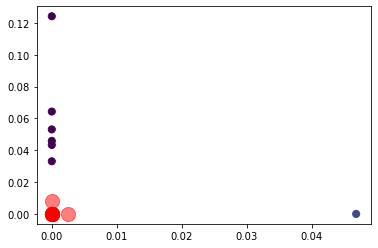

In [399]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = k_tfidfmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [400]:
labels = k_tfidfmeans_model.labels_.tolist()

In [401]:
from sklearn.decomposition import PCA
def get_cluster_scatter_plot(X, kmeans_model, kmeans_labels, title):
    pca = PCA(n_components=2).fit(X)
    datapoint = pca.transform(X)

    plt.figure(figsize=(10, 6))
    label1 = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', 
'#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']#, "#0000FF"]
    color = [label1[i] for i in kmeans_labels]
    scatter = plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
    plt.title(title + ' PCA Cluster Plot')
    plt.show()

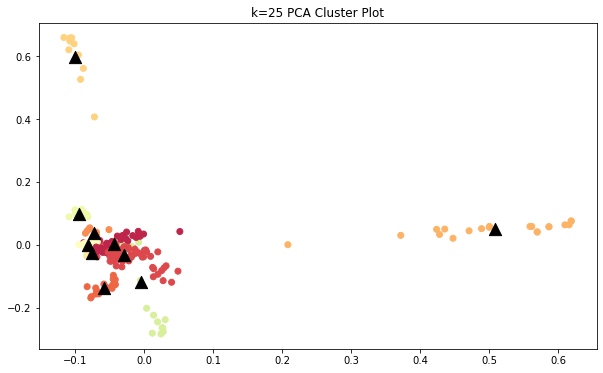

In [402]:
get_cluster_scatter_plot(X, k_tfidfmeans_model, labels, 'k=25')

### Explore K-means clustering of doc2vec matrix

In [371]:
def doc2vec_with_titles(corpus, processed_text, titles, vector_size = 100):
    #function to created doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

    model = Doc2Vec(documents, vector_size=100, window=3, min_count=2, workers=4)

    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

    doc2vec_df=doc2vec_df.reset_index()

    doc_titles={'title': titles}
    t=pd.DataFrame(doc_titles)

    doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

    doc2vec_df=doc2vec_df.drop('index', axis=1)
    return doc2vec_df

def k_means_doc2vec(doc2vec_df, final_processed_text,titles, k = 5):
    
    #this is a funciton to create the k_means outputs using the doc2vec matrics.  Required inputs
    #include the doc2vec matrix, and desired number of clusters.
    doc2vec_k_means=doc2vec_df.drop('title', axis=1)

    km = KMeans(n_clusters=k, random_state =89)
    km = km.fit(doc2vec_k_means)

    clusters_d2v = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        #print("Cluster %d:" % i)
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            #print(' %s ' % title, end='\n')
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list
    return km, cluster_title

doc2vec_model = doc2vec_with_titles(final_processed_text, processed_text,titles)
doc2vec_model.index = titles
k_means_model, cluster_title = k_means_doc2vec(doc2vec_model, final_processed_text,titles, k =5)

### Implementation of Silhouette Score 
Measurement most optimal number of clusters

In [372]:
k_list = [2, 5, 7, 10]
#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(doc2vec_df)
    labels = km.labels_.tolist()
    score = silhouette_score(doc2vec_df, labels)
    sil_scores.append(score)

### Plot Silhouette Scores

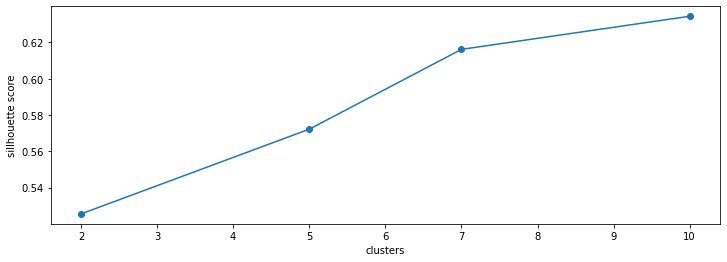

In [373]:
plt.figure(figsize=(12, 4))
plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

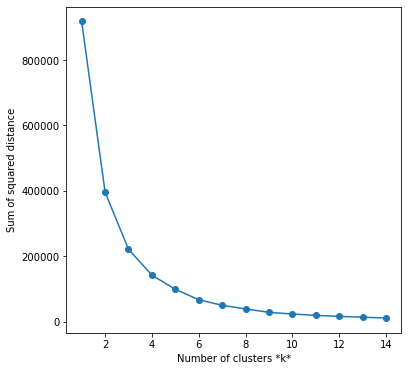

In [374]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(doc2vec_df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [375]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [376]:
X= doc2vec_model.drop('title', axis=1).values

In [377]:
#doc2vec_model= doc2vec_model.reset_index(drop= True, inplace=True)

In [378]:
y_kmeans = k_means_model.predict(doc2vec_model.drop('title', axis=1))

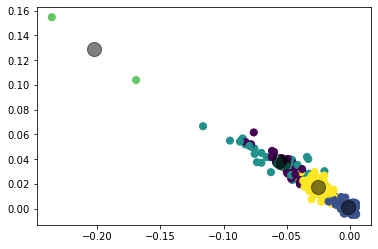

In [379]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = k_means_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [380]:
labels = k_means_model.labels_.tolist()

In [381]:

def get_cluster_scatter_plot(X, kmeans_model, kmeans_labels, title):
    pca = PCA(n_components=2).fit(X)
    datapoint = pca.transform(X)

    plt.figure(figsize=(10, 6))
    label1 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']#, "#0000FF"]
    color = [label1[i] for i in kmeans_labels]
    #print(color)
    scatter = plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

    centroids = kmeans_model.cluster_centers_
    centroidpoint = pca.transform(centroids)
    plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
    plt.title(title + ' PCA Cluster Plot')
    plt.show()

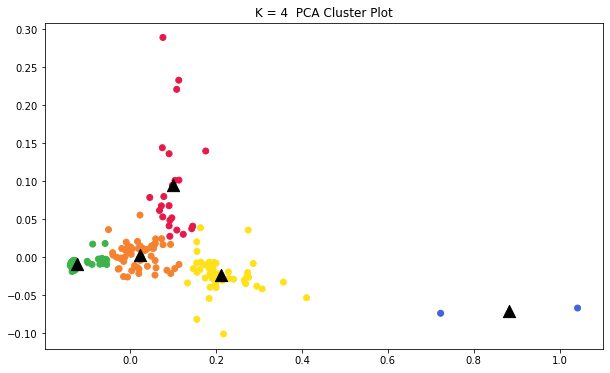

In [382]:
get_cluster_scatter_plot(X, k_means_model, labels, 'K = 4 ')

In [383]:
import seaborn as sns

In [384]:
titles

['HAG_Doc1_Frozen2',
 'HAG_Doc2_Frozen2',
 'HAG_Doc3_Frozen2',
 'HAG_Doc4_Frozen2',
 'HAG_Doc5_Frozen2',
 'HAG_Doc6_Frozen2',
 'HAG_Doc7_Frozen2',
 'HAG_Doc8_Frozen2',
 'HAG_Doc9_Frozen2',
 'HAG_Doc10_Frozen2',
 'RIA_Doc1_SpiderMan3',
 'RIA_Doc2_SpiderMan3',
 'RIA_Doc3_SpiderMan3',
 'RIA_Doc4_SpiderMan3',
 'RIA_Doc5_SpiderMan3',
 'RIA_Doc6_SpiderMan3',
 'RIA_Doc7_SpiderMan3',
 'RIA_Doc8_SpiderMan3',
 'RIA_Doc9_SpiderMan3',
 'RIA_Doc10_SpiderMan3',
 'CAA_Doc1_Cruella',
 'CAA_Doc2_Cruella',
 'CAA_Doc3_Cruella',
 'CAA_Doc4_Cruella',
 'CAA_Doc5_Cruella',
 'CAA_Doc6_Cruella',
 'CAA_Doc7_Cruella',
 'CAA_Doc8_Cruella',
 'CAA_Doc9_Cruella',
 'CAA_Doc10_Cruella',
 'AAT_Doc1_TheMatrixResurrecton',
 'AAT_Doc2_TheMatrixResurrecton',
 'AAT_Doc3_TheMatrixResurrecton',
 'AAT_Doc4_TheMatrixResurrecton',
 'AAT_Doc5_TheMatrixResurrecton',
 'AAT_Doc6_TheMatrixResurrecton',
 'AAT_Doc7_TheMatrixResurrecton',
 'AAT_Doc8_TheMatrixResurrecton',
 'AAT_Doc9_TheMatrixResurrecton',
 'AAT_Doc10_TheMatrixResurrecto

In [385]:
# def get_TSNE_PCA_scatter_plot(X, kmeans_model, kmeans_labels, title):
#     pca = PCA(n_components=2).fit(X)
#     X_pca = pca.transform(X)
#     y = titles

#     # randomly sample data to run quickly
#     rows = np.arange(249)
#     np.random.shuffle(rows)
#     n_select = 200
#     # reduce dimensionality with t-sne
#     tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=3500, learning_rate=2)
#     tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
#     # visualize
#     df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
#     #print([rows[:n_select]])
#     df_tsne['label'] = y[rows[:n_select]]
#     sns.lmplot(x='comp1', y='comp2', data=df_tsne,  fit_reg=False)
#     plt.show()

In [386]:
get_TSNE_PCA_scatter_plot(X, k_means_model, labels, 'TSNE ')

NameError: name 'get_TSNE_PCA_scatter_plot' is not defined

In [ ]:
# df_tsne